<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB_WEEK6_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [내용 필사]

## 앙상블 학습

## 앙상블 학습 개요

앙상블 학습(Ensemble Learning): 여러 개의 분류기를 생성하고 그 예측을 결합함으로 써 보다 정확한 최종 예측을 도출하는 기법. **정형 데이터 분류** 시에 뛰어난 성능을 보임.

앙상블 학습 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)
- **보팅**: 서로 다른 알고리즘을 가진 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정.
   - EX. 선형 회귀, K 최근접 이웃, 서포트 벡터 머신
- **배깅**: 같은 유형의 알고리즘을 가진 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정. 데이터 샘플링을 다르게 진행함.(**부트스트래핑** 분할 방식)
   - EX. 랜덤 포레스트
- **부스팅**: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에 **가중치**(weight)를 부여함.
   - EX. 그래디언트 부스트, XGBoost, LightGBM
- 스태킹: 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습시켜 결과를 예측.

## 보팅 유형 - 하트 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

하드 보팅: 예측 결괏값 중 다수의 분류기가 결정한 것을 최종 보팅 결괏값으로 선정.

**소프트 보팅**: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 가장 확률이 높은 레이블 값을 최종 보팅 결괏값으로 선정.

### 보팅 분류기(Voting Classifier)

VotingClassifier 클래스 제공.
- 주요 생성 인자: estimators, voting(defalut=hard)

## 랜덤 포레스트

## 랜덤 포레스트의 개요 및 실습

**랜덤 포레스트**

배깅의 대표적인 알고리즘.
- 배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘.

기반 알고리즘: 결정 트리 - 결정 트리의 쉽고 직관적인 장점을 그대로 가짐. But 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터.(**부트스트래핑 분할 방식**)

RandomForestClassifier 클래스 지원.

## 랜덤 포레스트 하이퍼 파라미터 및 튜닝

파라미터
- n_estimators: 결정 트리의 개수 지정. default=10. 많이 설정할수록 좋은 성능을 기대할 수 있으나 성능이 무조건 향상되는 것은 아님.
- max_features: max_features 파라미터. default=sqrt(auto).
- max_depth, min_samples_leaf, min_samples_split 등.
- **결정 트리에서 과적합 개선을 위해 사용되는 파라미터를 똑같이 적용할 수 있음.**

## GBM(Gradient Boositing Machine)

## GBM의 개요 및 실습

부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식.

AdaBoost(Adaptive boosting): 에이다부스트

**GBM**(Gradient Boositing Machine): 그래디언트 부스트

가중치 업데이트를 **경사 하강법**(Gradient Descent)을 이용함.
- 경사 하강법: (실제값-예측값)을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것.

GradientBoostingClassifier 클래스 제공.

## GBM 하이퍼 파라미터 소개

**loss**: 경사 하강법에서 사용할 비용 함수 지정. default=deviance 그대로 사용.

**learning_rate**: GBM이 학습을 진행할 때마다 적용하는 학습률. 0~1 사이의 값 지정 가능.(default=0.1)
- 작은 값 적용 시: 많은 weak learnier로 인해 수행 시간 길어짐. 최소 오류 값을 찾지 못할 수 있음.
- 큰 값 적용 시: 수행 시간 짧음. 최소 오류 값을 찾지 못할 수 있음.
- **n_estimators와 상호 보완적으로 조합**해 사용.

**n_estimators**: weak learner의 개수. default=100

**subsample**: weak learner가 학습에 사용하는 데이터 샘플링 비율. default=1(전체 학습 데이터를 기반으로 학습.)
- 과적합이 염려될 시 1보다 작은 값으로 설정.

## XGBoost(eXtra Gradient Boost)

## XGBoost 개요

XGBoost 장점
- 뛰어난 예측 성능.
- GBM 대비 빠른 수행 시간: 병렬 수행 등의 기능으로 GBM에 비해 수행 시간 빠름.
- 과적합 규제.
- Tree pruning(나무 가지치기): 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄임.
- 자체 내장된 교차 검증. (+ 반복 조기 중단 기능)
- 결손값 자체 처리.

## XGBoost 설치하기

## 파이썬 래퍼 XGBoost 하이퍼 파라미터

**일반 파라미터**: 스레드 개수, silent 모드 등의 선택을 위한 파라미터. 디폴트 파라미터 값을 바꾸는 경우는 거의 없음.
- **booster**: **gbtree**(default)/gblinear 선택.
- **silent**: **0**(default)/1 - 출력 메시지 여부.
- **nthread**: CPU의 실행 스레드 개수. defalut=전체 스레드를 사용.

**부스터 파라미터**: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등.
- **eta**: 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. 0~1 사이 값 지정. default=0.3(파이썬 래퍼 기반 xgboost)
- **num_boost_rounds**: GBM의 n_estimators와 같음.
- **min_child_weight**: 트리에서 추가적으로 가지를 나눌지 결정하기 위해 핑요한 데이터들의 weight 총합. - 과적합 조절.
- **gamma**: 트리의 리프 노드를 추가적으로 나눌지 결정할 최소 손실 감소 값. 해당 값보다 큰 손실이 감소된 경우 리프 노드를 분리. - 과적합 조절.(값이 클수록 과적합 감소.)
- **max_depth**: 3~10 사이의 값 입력.(default=6)
- **sub_sample**: 트리가 커져 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정. 0.5~1 사이의 값을 사용.(defalut=1)
- **colsample_bytree**: 트리 생성에 필요한 피처를 임의로 샘플링하는 데 사용. 매우 많은 피처가 있을 경우 과적합 조절.(default=1)
- **lambda**: L2 Regularization 적용 값. - 과적합 조절.
- **alpha**: L1 Regularization 적용 값. - 과적합 조절.
- **scale_pos_weight**: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터.(default=1)

**학습 태스크 파라미터**: 학습 수행 시의 객체 함수, 평가 등을 위한 지표 등을 설정하는 파라미터.
- **objective**: 최솟값을 가져야 할 손실 함수를 정의.
- **binary:logistic**: 이진 분류일 때 적용.
- **multi:softmax**: 다중 분류일 때 적용.
- **multi:softprob**: 개별 레이블 클래스의 해당되는 예측 확률을 반환.
- **eval_metric**: 검증에 사용되는 함수 정의. 회귀일 경우 **rmse**, 분류일 경우 **error**

**과적합 문제가 심각할 경우.**
1. eta 낮추기(0.01~0.1) + num_round 높이기
2. max_depth 낮추기
3. min_child_weight 높이기
4. gamma 높이기
5. subsample, colsample_bytree 조정

## 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

## 사이킷런 래퍼 XGBoost의 개요 및 적용

eta -> learning_rate

sub_sample -> subsample

lambda -> reg_lambda

alpha -> reg_alpha

n_estimators == num_boost_round







# [코드 필사]

## 앙상블 학습

## 앙상블 학습 개요

앙상블 학습(Ensemble Learning): 여러 개의 분류기를 생성하고 그 예측을 결합함으로 써 보다 정확한 최종 예측을 도출하는 기법. **정형 데이터 분류** 시에 뛰어난 성능을 보임.

앙상블 학습 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)
- **보팅**: 서로 다른 알고리즘을 가진 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정.
   - EX. 선형 회귀, K 최근접 이웃, 서포트 벡터 머신
- **배깅**: 같은 유형의 알고리즘을 가진 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정. 데이터 샘플링을 다르게 진행함.(**부트스트래핑** 분할 방식)
   - EX. 랜덤 포레스트
- **부스팅**: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에 **가중치**(weight)를 부여함.
   - EX. 그래디언트 부스트, XGBoost, LightGBM
- 스태킹: 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습시켜 결과를 예측.

## 보팅 유형 - 하트 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

하드 보팅: 예측 결괏값 중 다수의 분류기가 결정한 것을 최종 보팅 결괏값으로 선정.

**소프트 보팅**: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 가장 확률이 높은 레이블 값을 최종 보팅 결괏값으로 선정.

### 보팅 분류기(Voting Classifier)

VotingClassifier 클래스 제공.
- 주요 생성 인자: estimators, voting(defalut=hard)

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기.
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가.
classifiers=[lr_clf,knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred=classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도:{1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도:0.9561
LogisticRegression 정확도:0.9474
KNeighborsClassifier 정확도:0.9386


## 랜덤 포레스트

## 랜덤 포레스트의 개요 및 실습

**랜덤 포레스트**

배깅의 대표적인 알고리즘.
- 배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘.

기반 알고리즘: 결정 트리 - 결정 트리의 쉽고 직관적인 장점을 그대로 가짐. But 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터.(**부트스트래핑 분할 방식**)

RandomForestClassifier 클래스 지원.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df=pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/features.txt",sep='\s+',
                            header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출.
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def get_new_feature_name_df(old_feature_name_df):

    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])

    feature_dup_df=feature_dup_df.reset_index()

    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')

    new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)

    return new_feature_name_df

def get_human_dataset():
    feature_name_df = pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/features.txt", sep='\s+',
                                  header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    X_train = pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/train/X_train.txt", sep='\s+', names=feature_name)
    X_test = pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/test/X_test.txt", sep='\s+', names=feature_name)
    y_train = pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/train/y_train.txt", sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/test/y_test.txt", sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환.
X_train,X_test,y_train,y_test=get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가.
rf_clf=RandomForestClassifier(random_state=0,max_depth=8)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


## 랜덤 포레스트 하이퍼 파라미터 및 튜닝

파라미터
- n_estimators: 결정 트리의 개수 지정. default=10. 많이 설정할수록 좋은 성능을 기대할 수 있으나 성능이 무조건 향상되는 것은 아님.
- max_features: max_features 파라미터. default=sqrt(auto).
- max_depth, min_samples_leaf, min_samples_split 등.
- **결정 트리에서 과적합 개선을 위해 사용되는 파라미터를 똑같이 적용할 수 있음.**

In [7]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행.
rf_clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도:0.9157


In [8]:
rf_clf1=RandomForestClassifier(n_estimators=100,min_samples_leaf=6,max_depth=16,min_samples_split=2,random_state=0)
rf_clf1.fit(X_train,y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9253


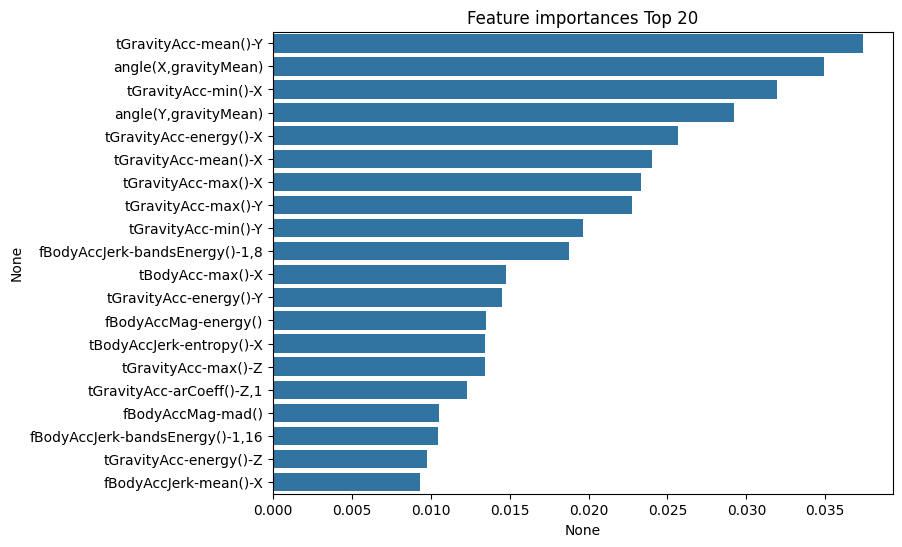

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

## GBM(Gradient Boositing Machine)

## GBM의 개요 및 실습

부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식.

AdaBoost(Adaptive boosting): 에이다부스트

**GBM**(Gradient Boositing Machine): 그래디언트 부스트

가중치 업데이트를 **경사 하강법**(Gradient Descent)을 이용함.
- 경사 하강법: (실제값-예측값)을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것.

GradientBoostingClassifier 클래스 제공.







In [10]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test=get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간:{0:.1f}초".format(time.time()-start_time))

GBM 정확도:0.9379
GBM 수행 시간:938.1초


## GBM 하이퍼 파라미터 소개

**loss**: 경사 하강법에서 사용할 비용 함수 지정. default=deviance 그대로 사용.

**learning_rate**: GBM이 학습을 진행할 때마다 적용하는 학습률. 0~1 사이의 값 지정 가능.(default=0.1)
- 작은 값 적용 시: 많은 weak learnier로 인해 수행 시간 길어짐. 최소 오류 값을 찾지 못할 수 있음.
- 큰 값 적용 시: 수행 시간 짧음. 최소 오류 값을 찾지 못할 수 있음.
- **n_estimators와 상호 보완적으로 조합**해 사용.

**n_estimators**: weak learner의 개수. default=100

**subsample**: weak learner가 학습에 사용하는 데이터 샘플링 비율. default=1(전체 학습 데이터를 기반으로 학습.)
- 과적합이 염려될 시 1보다 작은 값으로 설정.

## XGBoost(eXtra Gradient Boost)

## XGBoost 개요

XGBoost 장점
- 뛰어난 예측 성능.
- GBM 대비 빠른 수행 시간: 병렬 수행 등의 기능으로 GBM에 비해 수행 시간 빠름.
- 과적합 규제.
- Tree pruning(나무 가지치기): 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄임.
- 자체 내장된 교차 검증. (+ 반복 조기 중단 기능)
- 결손값 자체 처리.

## XGBoost 설치하기

In [ ]:
#pip install xgboost==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.5
    Uninstalling xgboost-3.0.5:
      Successfully uninstalled xgboost-3.0.5


In [11]:
import xgboost as xgb
from xgboost import XGBClassifier

## 파이썬 래퍼 XGBoost 하이퍼 파라미터

**일반 파라미터**: 스레드 개수, silent 모드 등의 선택을 위한 파라미터. 디폴트 파라미터 값을 바꾸는 경우는 거의 없음.
- **booster**: **gbtree**(default)/gblinear 선택.
- **silent**: **0**(default)/1 - 출력 메시지 여부.
- **nthread**: CPU의 실행 스레드 개수. defalut=전체 스레드를 사용.

**부스터 파라미터**: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등.
- **eta**: 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. 0~1 사이 값 지정. default=0.3(파이썬 래퍼 기반 xgboost)
- **num_boost_rounds**: GBM의 n_estimators와 같음.
- **min_child_weight**: 트리에서 추가적으로 가지를 나눌지 결정하기 위해 핑요한 데이터들의 weight 총합. - 과적합 조절.
- **gamma**: 트리의 리프 노드를 추가적으로 나눌지 결정할 최소 손실 감소 값. 해당 값보다 큰 손실이 감소된 경우 리프 노드를 분리. - 과적합 조절.(값이 클수록 과적합 감소.)
- **max_depth**: 3~10 사이의 값 입력.(default=6)
- **sub_sample**: 트리가 커져 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정. 0.5~1 사이의 값을 사용.(defalut=1)
- **colsample_bytree**: 트리 생성에 필요한 피처를 임의로 샘플링하는 데 사용. 매우 많은 피처가 있을 경우 과적합 조절.(default=1)
- **lambda**: L2 Regularization 적용 값. - 과적합 조절.
- **alpha**: L1 Regularization 적용 값. - 과적합 조절.
- **scale_pos_weight**: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터.(default=1)

**학습 태스크 파라미터**: 학습 수행 시의 객체 함수, 평가 등을 위한 지표 등을 설정하는 파라미터.
- **objective**: 최솟값을 가져야 할 손실 함수를 정의.
- **binary:logistic**: 이진 분류일 때 적용.
- **multi:softmax**: 다중 분류일 때 적용.
- **multi:softprob**: 개별 레이블 클래스의 해당되는 예측 확률을 반환.
- **eval_metric**: 검증에 사용되는 함수 정의. 회귀일 경우 **rmse**, 분류일 경우 **error**

**과적합 문제가 심각할 경우.**
1. eta 낮추기(0.01~0.1) + num_round 높이기
2. max_depth 낮추기
3. min_child_weight 높이기
4. gamma 높이기
5. subsample, colsample_bytree 조정





In [12]:
import xgboost

print(xgboost.__version__)

3.0.5


## 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [13]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
features=dataset.data
labels=dataset.target
cancer_df=pd.DataFrame(data=features,columns=dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [14]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [15]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features=cancer_df.iloc[:,:-1]
y_label=cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출.
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,test_size=0.2,random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리.
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=156)

print(X_train.shape,X_test.shape)
print(X_tr.shape,X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [16]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr=xgb.DMatrix(data=X_tr,label=y_tr)
dval=xgb.DMatrix(data=X_val,label=y_val)
dtest=xgb.DMatrix(data=X_test,label=y_test)

In [17]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr=xgb.DMatrix(data=X_tr,label=y_tr)
dval=xgb.DMatrix(data=X_val,label=y_val)
dtest=xgb.DMatrix(data=X_test,label=y_test)

In [18]:
params={'max_depth':3,
        'eta':0.05,
        'objective':'binary:logistic',
        'eval_metric':'logloss'}
num_rounds=400

In [20]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기합니다.
eval_list=[(dtr,'train'),(dval,'eval')] # 또는 eval_list=[(dval,'eval)]만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달.
xgb_model=xgb.train(params=params,dtrain=dtr,num_boost_round=num_rounds,early_stopping_rounds=50,evals=eval_list)

[0]	train-logloss:0.62473	eval-logloss:0.63088
[1]	train-logloss:0.58662	eval-logloss:0.60461
[2]	train-logloss:0.55210	eval-logloss:0.58205
[3]	train-logloss:0.52068	eval-logloss:0.56165
[4]	train-logloss:0.49173	eval-logloss:0.54101
[5]	train-logloss:0.46517	eval-logloss:0.52206
[6]	train-logloss:0.44009	eval-logloss:0.50271
[7]	train-logloss:0.41646	eval-logloss:0.48606
[8]	train-logloss:0.39505	eval-logloss:0.46961
[9]	train-logloss:0.37523	eval-logloss:0.45485
[10]	train-logloss:0.35682	eval-logloss:0.44120
[11]	train-logloss:0.33964	eval-logloss:0.43123
[12]	train-logloss:0.32279	eval-logloss:0.41962
[13]	train-logloss:0.30783	eval-logloss:0.40848
[14]	train-logloss:0.29308	eval-logloss:0.39857
[15]	train-logloss:0.27928	eval-logloss:0.38945
[16]	train-logloss:0.26681	eval-logloss:0.38171
[17]	train-logloss:0.25498	eval-logloss:0.37381
[18]	train-logloss:0.24352	eval-logloss:0.36656
[19]	train-logloss:0.23307	eval-logloss:0.36014
[20]	train-logloss:0.22290	eval-logloss:0.35395
[2

In [21]:
pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.776 0.058 0.975 1.    0.999 0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [25]:
get_clf_eval(y_test,preds,pred_probs)

오차행렬
[[35  2]
 [ 2 75]]
정확도:0.9649,정밀도:0.9740,재현율:0.9740,F1:0.9740, AUC:0.9600


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

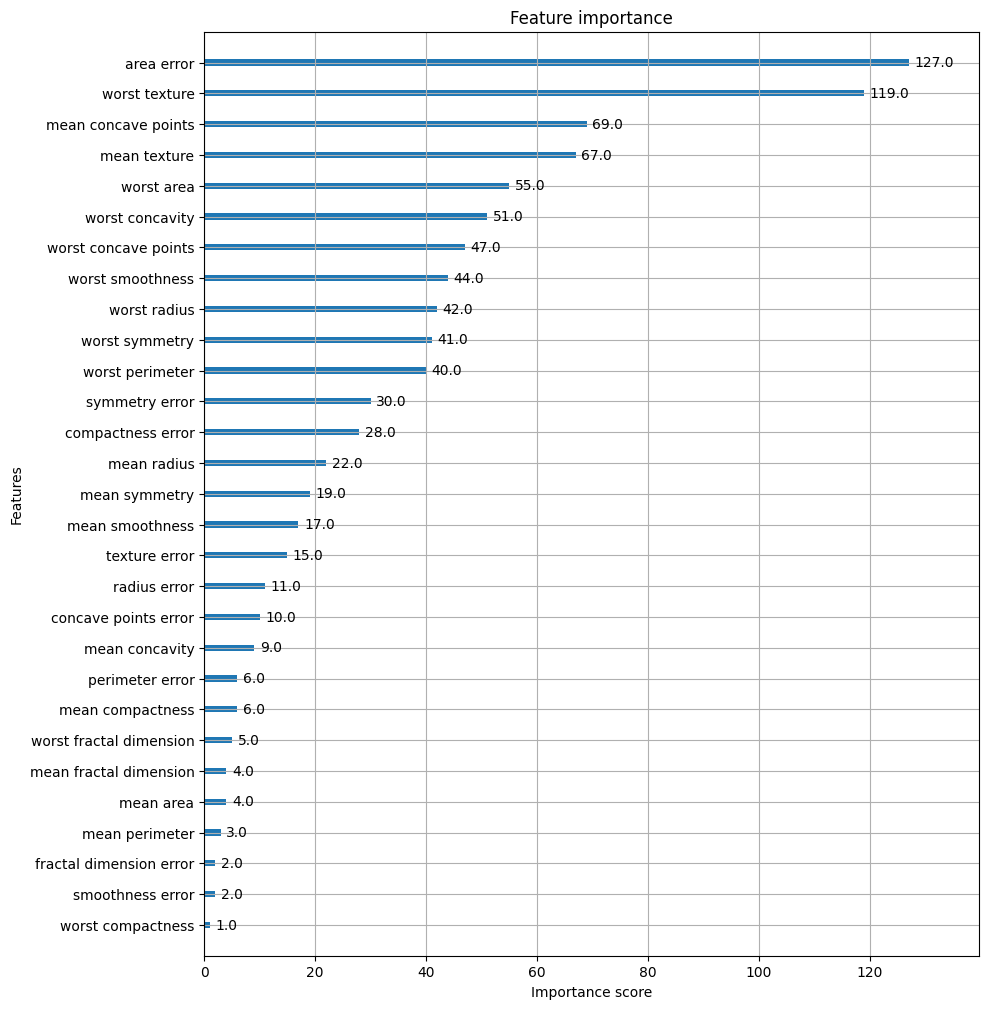

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

## 사이킷런 래퍼 XGBoost의 개요 및 적용

eta -> learning_rate

sub_sample -> subsample

lambda -> reg_lambda

alpha -> reg_alpha

n_estimators == num_boost_round

In [28]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metrix 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.05,max_depth=3,eval_metric='logloss')
xgb_wrapper.fit(X_train,y_train,verbose=True)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

In [29]:
get_clf_eval(y_test,w_preds,w_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도:0.9649,정밀도:0.9620,재현율:0.9870,F1:0.9744, AUC:0.9530


In [34]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.05,max_depth=3,early_stopping_rounds=50,eval_metric="logloss")
evals=[(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr,y_tr,eval_set=evals,verbose=True)
ws50_preds=xgb_wrapper.predict(X_test)
ws50_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

In [35]:
get_clf_eval(y_test,ws50_preds,ws50_pred_proba)

오차행렬
[[35  2]
 [ 2 75]]
정확도:0.9649,정밀도:0.9740,재현율:0.9740,F1:0.9740, AUC:0.9600


In [36]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.05,max_depth=3,early_stopping_rounds=10,eval_metric='logloss')
xgb_wrapper.fit(X_tr,y_tr, eval_set=evals, verbose=True)

ws10_preds=xgb_wrapper.predict(X_test)
ws10_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,ws10_preds,ws10_pred_proba)

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

plot_importance(): 피처의 중요도 시각화.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

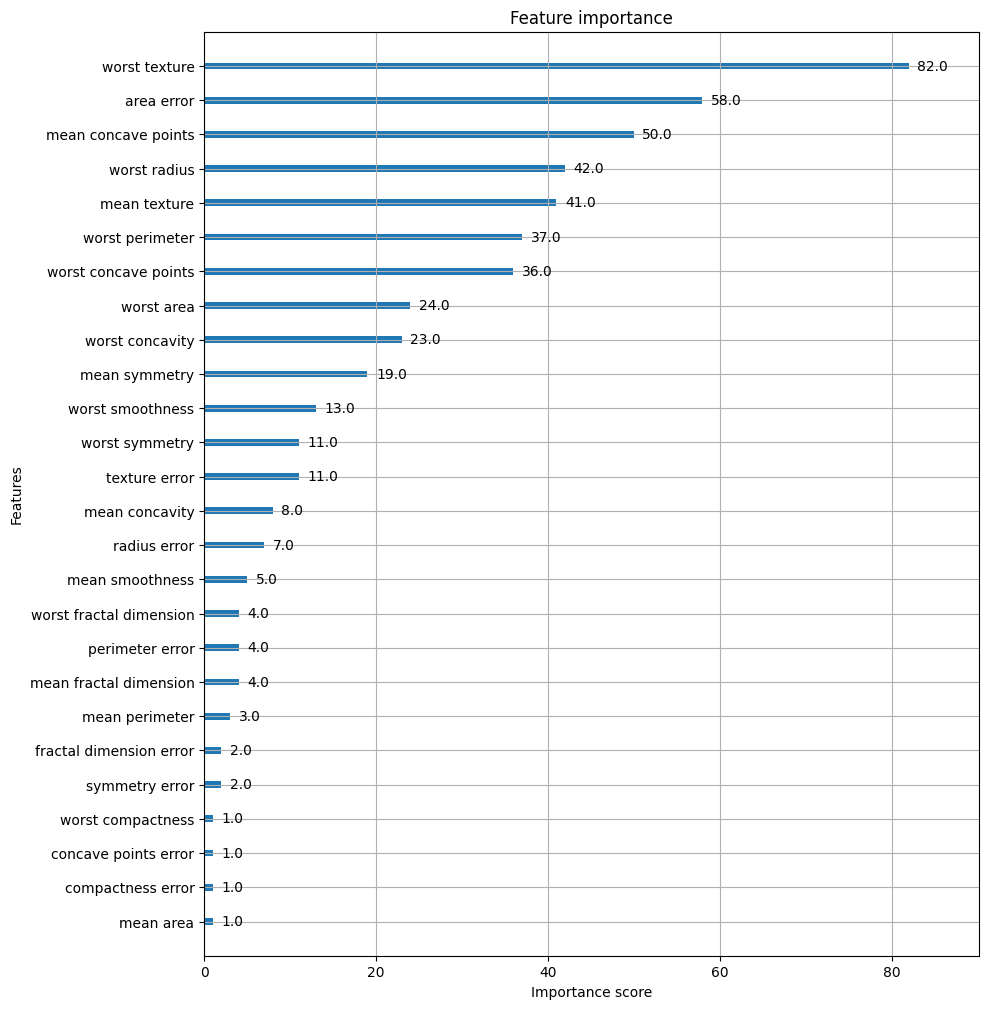

In [37]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper,ax=ax)